In [1]:
import cantera as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#Setting plotting defaults
plt.style.use('ggplot')
plt.style.use('seaborn-pastel')

#Defining the gas
gas = ct.Solution('gri30.cti')

#Defining reactor temperature and pressure
initial_state = 1200, 101325
gas.TP = initial_state

#Defining the fuel, oxidizer and set the stoichiometry
gas.set_equivalence_ratio(phi=1.0, fuel='C2H6', oxidizer={'o2':1.0, 'n2':3.76})

#Creating a batch reactor object and adding it to a reactor network
r = ct.IdealGasConstPressureReactor(gas)
reactorNetwork = ct.ReactorNet([r])

In [2]:
#Compiling a list of all variables for which data will be stored
stateVariableNames = [r.component_name(item) for item in range(r.n_vars)]

#Creating a DataFrame using the above list
timeHistory = pd.DataFrame(columns=stateVariableNames)

In [3]:
#Creating function which computes the ignition delay from the occurence
#of the peak in species' concentration.
def ignitionDelay(df, species):
    return df[species].idxmax()


In [4]:
estimatedIgnitionDelayTime = 1
t = 0
counter = 0
while(t < estimatedIgnitionDelayTime):
    t = reactorNetwork.step()
    #Saving only every 10th value to save time
    if (counter%10 == 0):
        timeHistory.loc[t] = reactorNetwork.get_state()
    counter+=1

In [5]:
#Using the 'oh' species to compute the ignition delay
tau = ignitionDelay(timeHistory, 'OH')

print('Computed Ignition Delay: {:.3e} seconds'.format(tau))

Computed Ignition Delay: 5.138e-03 seconds


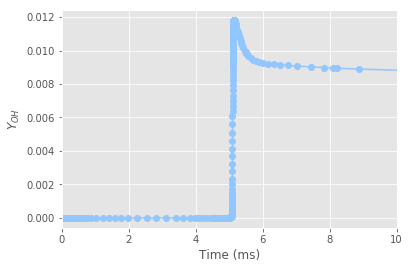

In [6]:
#Plotting results
plt.plot(timeHistory.index*1000, timeHistory['OH'], '-o')
plt.xlabel('Time (ms)')
plt.ylabel('$Y_{OH}$')
plt.xlim([0,10])
plt.savefig('Y_OH.png')
plt.show()

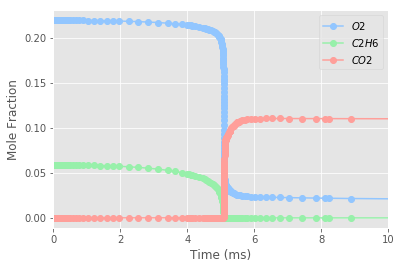

In [7]:
plt.plot(timeHistory.index*1000, timeHistory['O2'], '-o')
plt.plot(timeHistory.index*1000, timeHistory['C2H6'], '-o')
#plt.plot(timeHistory.index*1000, timeHistory['H2O'], '-o')
plt.plot(timeHistory.index*1000, timeHistory['CO2'], '-o')
plt.xlabel('Time (ms)')
plt.ylabel('Mole Fraction')
plt.xlim([0,10])
plt.legend(('$O2$', '$C2H6$', '$CO2$'))
plt.savefig('Y_O2.png')
plt.show()

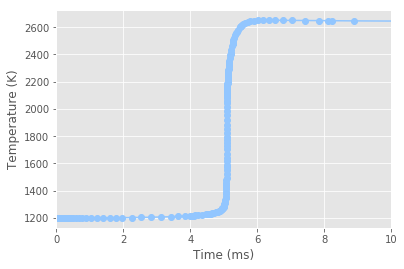

In [8]:
plt.plot(timeHistory.index*1000, timeHistory['temperature'], '-o')
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.xlim([0,10])
plt.savefig('T.png')
plt.show()

In [9]:
"""
Calculations for different initial conditions - temperature
"""
#Making a list of the temperatures to run simulations at
T = []
counter = 0
while counter<45:
    T.append(900+counter*25)
    counter+=1

In [10]:
#Creating a dataFrame in wchich will be stored results
ignitionDelays = pd.DataFrame(data={'T': T})
ignitionDelays['ignDelay'] = np.nan

In [11]:
for i, temperature in enumerate(T):
    #Setting the gas and reactor
    reactorTemperature = temperature
    reactorPressure = 101325.0
    gas.TP = reactorTemperature, reactorPressure
    gas.set_equivalence_ratio(phi=1.0, fuel='C2H6', oxidizer={'o2':1.0, 'n2':3.76})
    r = ct.IdealGasConstPressureReactor(gas)
    reactorNetwork = ct.ReactorNet([r])
    
    #Creating an empty data frame
    timeHistory = pd.DataFrame(columns=timeHistory.columns)
    
    t = 0
    counter = 0
    estimatedIgnitionDelayTime = 25
    while t < estimatedIgnitionDelayTime:
        t = reactorNetwork.step()
        if not counter % 20:
            timeHistory.loc[t] = r.get_state()
        counter += 1
    
    tau = ignitionDelay(timeHistory, 'OH')
    
    print('Computed Ignition Delay: {:.3e} seconds for T={}K.'.format(tau, temperature))
    
    ignitionDelays.at[i, 'ignDelay'] = tau

Computed Ignition Delay: 2.235e+01 seconds for T=900K.
Computed Ignition Delay: 8.957e+00 seconds for T=925K.
Computed Ignition Delay: 3.778e+00 seconds for T=950K.
Computed Ignition Delay: 1.669e+00 seconds for T=975K.
Computed Ignition Delay: 7.694e-01 seconds for T=1000K.
Computed Ignition Delay: 3.685e-01 seconds for T=1025K.
Computed Ignition Delay: 1.829e-01 seconds for T=1050K.
Computed Ignition Delay: 9.383e-02 seconds for T=1075K.
Computed Ignition Delay: 4.964e-02 seconds for T=1100K.
Computed Ignition Delay: 2.704e-02 seconds for T=1125K.
Computed Ignition Delay: 1.514e-02 seconds for T=1150K.
Computed Ignition Delay: 8.705e-03 seconds for T=1175K.
Computed Ignition Delay: 5.135e-03 seconds for T=1200K.
Computed Ignition Delay: 3.111e-03 seconds for T=1225K.
Computed Ignition Delay: 1.933e-03 seconds for T=1250K.
Computed Ignition Delay: 1.234e-03 seconds for T=1275K.
Computed Ignition Delay: 8.093e-04 seconds for T=1300K.
Computed Ignition Delay: 5.507e-04 seconds for T=132

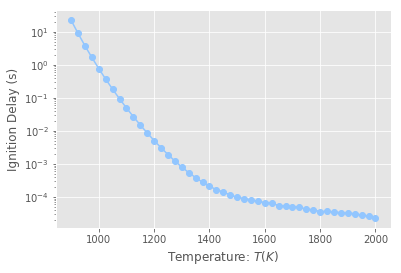

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogy(ignitionDelays['T'], ignitionDelays['ignDelay'], 'o-')
ax.set_ylabel('Ignition Delay (s)')
ax.set_xlabel(r'Temperature: $T(K)$');
plt.savefig('tau_T.png')

In [13]:
"""
Calculations for different initial conditions - pressure
"""
#Making a list of the pressures to run simulations at
P = []
counter = 0
while counter<45:
    P.append(1000+pow(counter, 2.5)*500)
    counter+=1

#Creating a dataFrame in wchich will be stored results
ignitionDelays = pd.DataFrame(data={'P': P})
ignitionDelays['ignDelay'] = np.nan

In [16]:
for i, pressure in enumerate(P):
    #Setting the gas and reactor
    reactorTemperature = 1200
    reactorPressure = pressure
    gas.TP = reactorTemperature, reactorPressure
    gas.set_equivalence_ratio(phi=1.0, fuel='C2H6', oxidizer={'o2':1.0, 'n2':3.76})
    r = ct.IdealGasConstPressureReactor(gas)
    reactorNetwork = ct.ReactorNet([r])
    
    #Creating an empty data frame
    timeHistory = pd.DataFrame(columns=timeHistory.columns)
    
    t = 0
    counter = 0
    estimatedIgnitionDelayTime = 1
    while t < estimatedIgnitionDelayTime:
        t = reactorNetwork.step()
        if not counter % 20:
            timeHistory.loc[t] = r.get_state()
        counter += 1
    
    tau = ignitionDelay(timeHistory, 'OH')
    
    print('Computed Ignition Delay: {:.3e} seconds for P={:.2}bar.'.format(tau, pressure/100000))
    
    ignitionDelays.at[i, 'ignDelay'] = tau

Computed Ignition Delay: 4.872e-01 seconds for P=0.01bar.
Computed Ignition Delay: 2.576e-01 seconds for P=0.015bar.
Computed Ignition Delay: 7.475e-02 seconds for P=0.038bar.
Computed Ignition Delay: 3.072e-02 seconds for P=0.088bar.
Computed Ignition Delay: 1.738e-02 seconds for P=0.17bar.
Computed Ignition Delay: 1.149e-02 seconds for P=0.29bar.
Computed Ignition Delay: 8.467e-03 seconds for P=0.45bar.
Computed Ignition Delay: 6.634e-03 seconds for P=0.66bar.
Computed Ignition Delay: 5.451e-03 seconds for P=0.92bar.
Computed Ignition Delay: 4.618e-03 seconds for P=1.2bar.
Computed Ignition Delay: 4.009e-03 seconds for P=1.6bar.
Computed Ignition Delay: 3.546e-03 seconds for P=2.0bar.
Computed Ignition Delay: 3.183e-03 seconds for P=2.5bar.
Computed Ignition Delay: 2.891e-03 seconds for P=3.1bar.
Computed Ignition Delay: 2.651e-03 seconds for P=3.7bar.
Computed Ignition Delay: 2.451e-03 seconds for P=4.4bar.
Computed Ignition Delay: 2.281e-03 seconds for P=5.1bar.
Computed Ignition D

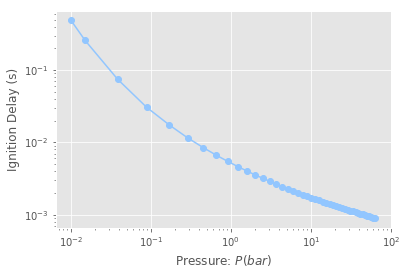

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(ignitionDelays['P']/100000, ignitionDelays['ignDelay'], 'o-')
ax.set_ylabel('Ignition Delay (s)')
ax.set_xlabel(r'Pressure: $P(bar)$');
plt.savefig('tau_P.png')

In [18]:
"""
Calculations for different initial conditions - stoichiometric coefficient
"""
#Making a list of the phis to run simulations at
phis = []
counter = 0
while counter<40:
    phis.append(0.515+counter*0.05)
    counter+=1
#Creating a dataFrame in wchich will be stored results
ignitionDelays = pd.DataFrame(data={'phi': phis})
ignitionDelays['ignDelay'] = np.nan

In [20]:
for i, stcoef in enumerate(phis):
    #Setting the gas and reactor
    reactorTemperature = 1200
    reactorPressure = 101325.0
    gas.TP = reactorTemperature, reactorPressure
    gas.set_equivalence_ratio(phi=stcoef, fuel='C2H6', oxidizer={'o2':1.0, 'n2':3.76})
    r = ct.IdealGasConstPressureReactor(gas)
    reactorNetwork = ct.ReactorNet([r])
    
    #Creating an empty data frame
    timeHistory = pd.DataFrame(columns=timeHistory.columns)
    
    t = 0
    counter = 0
    estimatedIgnitionDelayTime = 1000
    while t < estimatedIgnitionDelayTime:
        t = reactorNetwork.step()
        if not counter % 20:
            timeHistory.loc[t] = r.get_state()
        counter += 1
    
    tau = ignitionDelay(timeHistory, 'OH')
    
    print('Computed Ignition Delay: {:.3e} seconds for phi={:.4}.'.format(tau, stcoef))
    
    ignitionDelays.at[i, 'ignDelay'] = tau

Computed Ignition Delay: 5.348e-03 seconds for phi=0.515.
Computed Ignition Delay: 5.328e-03 seconds for phi=0.565.
Computed Ignition Delay: 5.305e-03 seconds for phi=0.615.
Computed Ignition Delay: 5.293e-03 seconds for phi=0.665.
Computed Ignition Delay: 5.267e-03 seconds for phi=0.715.
Computed Ignition Delay: 5.248e-03 seconds for phi=0.765.
Computed Ignition Delay: 5.225e-03 seconds for phi=0.815.
Computed Ignition Delay: 5.207e-03 seconds for phi=0.865.
Computed Ignition Delay: 5.180e-03 seconds for phi=0.915.
Computed Ignition Delay: 5.158e-03 seconds for phi=0.965.
Computed Ignition Delay: 5.132e-03 seconds for phi=1.015.
Computed Ignition Delay: 5.102e-03 seconds for phi=1.065.
Computed Ignition Delay: 5.078e-03 seconds for phi=1.115.
Computed Ignition Delay: 5.050e-03 seconds for phi=1.165.
Computed Ignition Delay: 5.023e-03 seconds for phi=1.215.
Computed Ignition Delay: 4.995e-03 seconds for phi=1.265.
Computed Ignition Delay: 4.970e-03 seconds for phi=1.315.
Computed Ignit

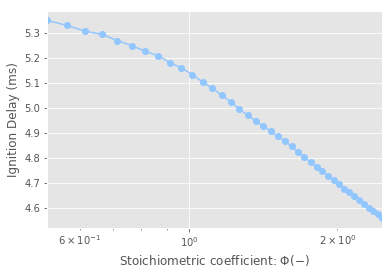

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogx(ignitionDelays['phi'], ignitionDelays['ignDelay']*1000, 'o-')
ax.set_ylabel('Ignition Delay (ms)')
ax.set_xlabel(r'Stoichiometric coefficient: $\Phi(-)$');
plt.xlim([0.515, 2.465])
plt.savefig('tau_phi.png')